**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
style.use('fivethirtyeight')

In [3]:
def errorsfunc(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(66)
    if errors is None:
        return a*x + b 
    else:
        #return a*x + b * errorsfunc(x)
        return a*x + b + np.random.randn() * errorsfunc(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [4]:
xlst = np.linspace(10,100,10)

In [5]:
xlst

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [8]:
error = [errorsfunc(x) for x in xlst]

In [9]:
y = [line(1, x, errors=True) for x in xlst]

Text(0.5,1,'Fitted Line')

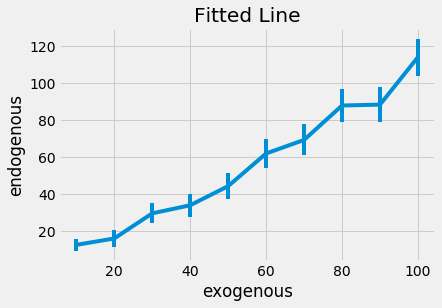

In [10]:
plt.errorbar(xlst, y, error)
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.title('Fitted Line')

figure 1: it can be seen that the error bar becomes larger as the x value grows due to the equation (finding the square root)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [11]:
y

[12.429463551416154,
 15.889279477991966,
 29.483566058370165,
 33.870637427880069,
 44.217841908557851,
 61.901257771323635,
 69.228065411813546,
 87.867453090019794,
 88.345961759874797,
 114.07361852350446]

In [12]:
x= xlst

In [13]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [14]:
X = sm.add_constant(xlst)

In [15]:
X

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [16]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1180.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.40e-11
Time:                        00:13:00   Log-Likelihood:                -31.429
No. Observations:                  10   AIC:                             64.86
Df Residuals:                       9   BIC:                             65.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0348      0.030     34.358      0.000         0.967     1.103
==============================================================================
Omnibus:                        2.212   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.079
Skew:                           0.792   Prob(JB):                        0.583
Kurtosis:                       2.714   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#THE RIGHT WAY
#passing in the capital X which is the one with a constant
olsfit = smf.OLS(y, X).fit()
olsfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     328.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           8.78e-08
Time:                        00:13:01   Log-Likelihood:                -30.262
No. Observations:                  10   AIC:                             64.52
Df Residuals:                       8   BIC:                             65.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.5249      3.811     -1.450      0.185       -14.312     3.262
x1             1.1137      0.061     18.136      0.000         0.972     1.255
==============================================================================
Omnibus:                        1.348   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                0.770
Skew:                           0.256   Prob(JB):                        0.680
Kurtosis:                       1.741   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

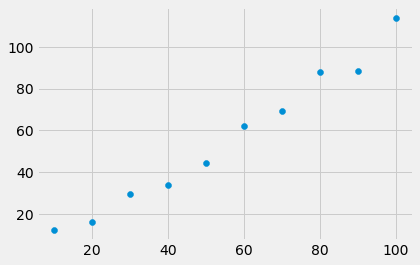

In [18]:
plt.scatter(x, y, label = "just a line")

In [20]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

Text(0.5,1,'Statsmodel fits the right and wrong way')

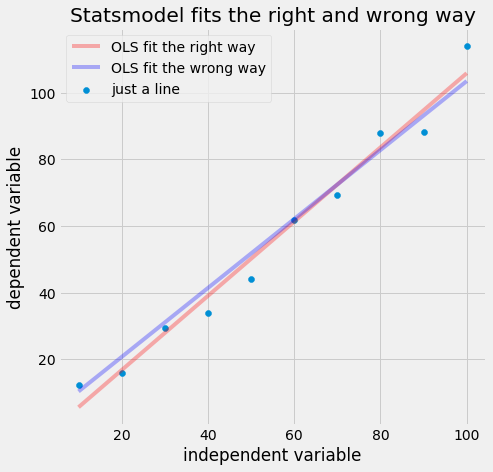

In [21]:
#normally you wouldnt want to predict on the same values that 
#were originally passed in to fit
#but thats not particularly th point of this exercise. 
newX = np.linspace(10,100,10)
newXconst = sm.add_constant(newX)

fig = pl.figure(figsize=(15,15))
ax2 = fig.add_subplot(221)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(x, olsfit.predict(newXconst), 'r', alpha=0.3, label = "OLS fit the right way")

ax2.plot(x, smfit.predict(newX), 'b', alpha=0.3, 
         label = "OLS fit the wrong way")
ax2.legend()
plt.title('Statsmodel fits the right and wrong way')


Figure 2: when graphing the scatter plot and the two fits, you can see that the fits vary slightly on these 10 points. I would assume the difference would grow on larger sets of data. 

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [22]:
x= np.linspace(10,100,10)

In [23]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [24]:
error = [errorsfunc(x) for x in x]

In [25]:
error

[3.1622776601683795,
 4.4721359549995796,
 5.4772255750516612,
 6.324555320336759,
 7.0710678118654755,
 7.745966692414834,
 8.3666002653407556,
 8.9442719099991592,
 9.4868329805051381,
 10.0]

In [26]:
y = [line(1, x, b=200, errors=True) for x in x]

Text(0.5,1,'Fitted Line')

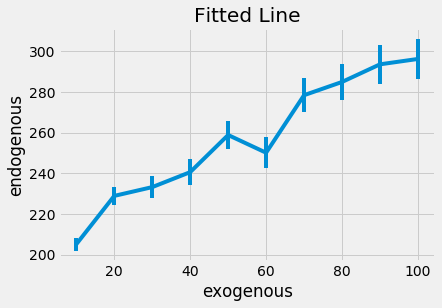

In [27]:
plt.errorbar(x, y, error)
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.title('Fitted Line')

figure 3: the error is based off of the x, so understandably the size of the error bars have not changed by increasing the y intercept

# 6. repeat step 3

In [28]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     59.29
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.00e-05
Time:                        00:13:42   Log-Likelihood:                -59.609
No. Observations:                  10   AIC:                             121.2
Df Residuals:                       9   BIC:                             121.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.8833      0.504      7.700      0.000         2.742     5.024
==============================================================================
Omnibus:                        0.979   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.627
Skew:                          -0.049   Prob(JB):                        0.731
Kurtosis:                       1.777   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
constx = sm.add_constant(x)

In [30]:
#THE RIGHT WAY
#passing in the capital X which is the one with a constant
olsfit = smf.OLS(y, constx).fit()
olsfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.02e-06
Time:                        00:13:43   Log-Likelihood:                -32.266
No. Observations:                  10   AIC:                             68.53
Df Residuals:                       8   BIC:                             69.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        202.3713      4.656     43.463      0.000       191.634   213.108
x1             0.9923      0.075     13.223      0.000         0.819     1.165
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   2.830
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.852
Skew:                          -0.563   Prob(JB):                        0.653
Kurtosis:                       2.119   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Statsmodel fits the right and wrong way')

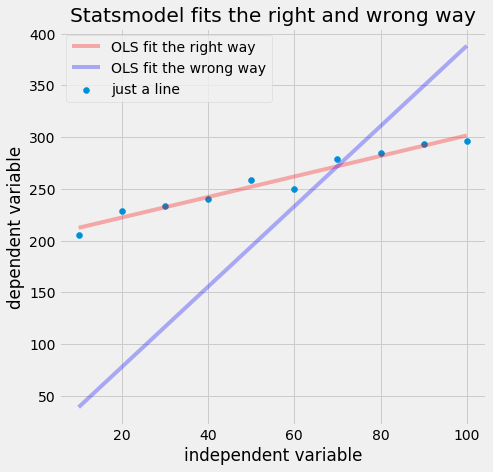

In [31]:
fig = pl.figure(figsize=(15,15))
newX = np.linspace(10,100,10)
newXconst = sm.add_constant(newX)
ax2 = fig.add_subplot(221)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(x, olsfit.predict(newXconst), 'r', alpha=0.3, label = "OLS fit the right way")

ax2.plot(x, smfit.predict(newX), 'b', alpha=0.3, 
         label = "OLS fit the wrong way")
ax2.legend()
plt.title('Statsmodel fits the right and wrong way')

figure 4: now the difference between doing it the right way and the wrong way is much more noticable. This is when the y intercept is increased 

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [32]:
#FROM THE Lab 8
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

In [33]:
WLSfit = myregression(constx, y, method='W')


linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            WLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.02e-06
Time:                        00:13:51   Log-Likelihood:                -32.266
No. Observations:                  10   AIC:                             68.53
Df Residuals:                       8   BIC:                             69.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        202.3713      4

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Text(0.5,1,'Statsmodel fits for OLS and WLS')

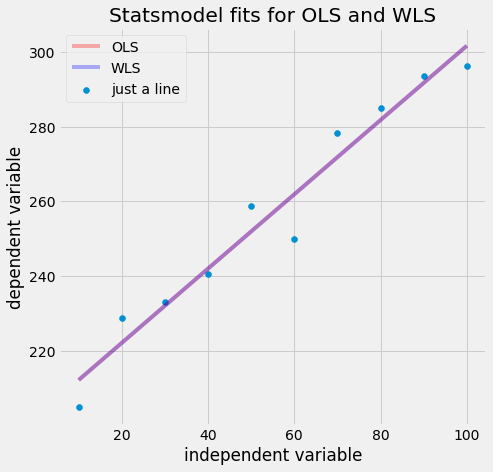

In [34]:
#normally you wouldnt want to predict on the same values that 
#were originally passed in to fit
#but thats not particularly th point of this exercise. 
newX = np.linspace(10,100,10)
newXconst = sm.add_constant(newX)

fig = pl.figure(figsize=(15,15))
ax2 = fig.add_subplot(221)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(x, olsfit.predict(newXconst), 'r', alpha=0.3, label = "OLS")

ax2.plot(x, WLSfit.predict(newXconst), 'b', alpha=0.3, 
         label = "WLS")
ax2.legend()
plt.title('Statsmodel fits for OLS and WLS')

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

NameError: name 'smfitDoneRight' is not defined

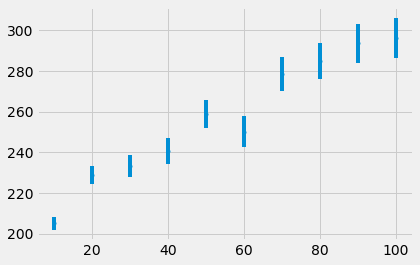

In [36]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errorsfunc(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();